<a href="https://colab.research.google.com/github/krauseannelize/project-eda-car-trends/blob/main/car_trends_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Project | Car Trends

## 1 - Define Objectives

The objective of this project is to explore key patterns and relationships within the car dataset in order to generate actionable insights through visualization. Specifically, the analysis will focus on identifying:

- What trends exist in pricing (`MSRP`) and market size (`Vehicle Size`)?
- How does horsepower (`Engine HP`) relate to price (`MSRP`)?
- Is there a significant difference in price (`MSRP`) for different drivetrains (`Driven_Wheels`)?
- How do MPG (`city mpg` and `highway MPG`) trends change with transmission type (`Transmission Type`)?

## 2 - Gather Data

In this step, the [raw car dataset](https://drive.google.com/file/d/1e4HSBauh4RNs-C0_LgtEWgim2E8PEnHV/view?usp=sharing) is read into Colab as a `pandas` DataFrame for initial exploration. This includes:

- previewing sample rows to confirm the dataset has been successfully loaded,
- inspecting shape,
- reviewing basic information, and
- generating summary statistics.

A detailed description of the dataset is provided in a separate [metadata sheet](https://drive.google.com/file/d/1wndZaoIx5v8HRTPPGYC9StmagKFGMVA8/view?usp=sharing).

In [1]:
# Import pandas for data analysis and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read car dataset as pandas DataFrame
car_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ms-data/car-trends.csv')

Mounted at /content/drive


In [2]:
# Preview car dataset
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Inspect shape of the car dataset
print(f"Dataset shape\nRows: {car_df.shape[0]}\nColumns: {car_df.shape[1]}")

Dataset shape
Rows: 11914
Columns: 16


In [4]:
# Review basic information about car dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
# Generate summary statistics for car dataset
car_df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## 3 - Data Cleaning

Before conducting any analysis, the dataset must be cleaned to ensure accuracy and consistency. This process involves verifying data types, standardizing string values, handling missing data, removing duplicates and filtering relevant data.

### 3.1 Initialize Clean Dataset

In [6]:
# Create a working copy of the dataset for cleaning
clean_df = car_df.copy()

### 3.2 Data Type Conversion

In [7]:
# Confirm data types are correct
clean_df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


All data types are correct and no conversion is required.

### 3.3 Standardizing String Values

In [8]:
# 1. Select all string columns
string_cols = clean_df.select_dtypes(include='object').columns

# 2. Trim leading and trailing whitespace
clean_df[string_cols] = clean_df[string_cols].apply(lambda x: x.str.strip())

# 3. Convert string case to lower
clean_df[string_cols] = clean_df[string_cols].apply(lambda x: x.str.lower())

# 4. Confirm standardization
clean_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 3.4 Remove Duplicate Rows

In [9]:
# Identify duplicate rows
clean_df.duplicated().sum()

np.int64(715)

In [10]:
# Drop duplicate rows
clean_df.drop_duplicates(inplace=True)

In [11]:
# Identify duplicate rows
clean_df.duplicated().sum()

np.int64(0)

### 3.5 Filter the Dataset

In [12]:
# Only keep cars manufactured from 1995 onwards
clean_df = clean_df[clean_df['Year'] >= 1995].reset_index(drop=True)

In [13]:
# Check unique year values and sort
np.sort(clean_df['Year'].unique())

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017])

### 3.6 Handle Missing Values

In [14]:
# Identify columns with missing values
clean_df.isna().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,28
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3079


In [15]:
# Drop 'Market Category' column due to excessive missing values
clean_df = clean_df.drop(columns=['Market Category'])

In [16]:
# 3 missing 'Engine Fuel Type' are for Suzuki Verona 2004
# Imputes 'regular unleaded' based on 2005–2006 values
clean_df['Engine Fuel Type'] = clean_df['Engine Fuel Type'].fillna('regular unleaded')

In [17]:
# Impute missing Number of Doors using Vehicle Style rules: coupe=2, sedan=4”
clean_df['Number of Doors'] = clean_df['Number of Doors'].fillna(clean_df['Vehicle Style'].map({'coupe': 2, 'sedan': 4}))

In [18]:
# Impute missing Engine Cylinders:
# - EVs: 0 cylinders (consistent with other EVs)
# - Mazda RX-7/8: rotary engines (no traditional cylinders) ➡ set to 0 for consistency
clean_df['Engine Cylinders'] = clean_df['Engine Cylinders'].fillna(0)

In [19]:
# Imputed missing Engine HP values using median within each Make + Model group
clean_df['Engine HP'] = clean_df.groupby(['Make', 'Model'])['Engine HP'].transform(lambda x: x.fillna(x.median()))

In [20]:
# Recheck number of missing values in 'Engine HP'
clean_df['Engine HP'].isna().sum()

np.int64(38)

In [21]:
# Rows still missing Engine HP values after this step dropped for contextual accuracy
clean_df = clean_df.dropna(subset=['Engine HP']).reset_index(drop=True)

In [22]:
# Confirm columns with missing values
clean_df.isna().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0


## 4 - Feature Engineering

### 4.1 Create New Columns

Three new columns are added to support later analysis:

- **Total MPG**: the simple average of `city mpg` and `highway MPG`, providing a single measure of fuel efficiency.  
- **Price per HP**: `MSRP` divided by `Engine HP`, giving a measure of cost relative to performance.
- **MSRP (K)**: `MSRP` divided by 1000 to create a scaled version of `MSRP` for improved readability in visualizations.<sup>1</sup>

<sup>1</sup> _The scaled `MSRP (K)` column was not part of the assignment, but was added to enhance plot interpretation._

In [23]:
# Add column called `Total MPG` that is average of `city mpg` and `highway MPG`
clean_df['Total MPG'] = (clean_df['city mpg'] + clean_df['highway MPG']) / 2

# Add column called `Price per HP` as `MSRP` divided by `Engine HP`
# Replace 0 HP with NaN to avoid division errors
clean_df['Price per HP'] = clean_df['MSRP'] / clean_df['Engine HP'].replace(0, np.nan)

# Add column to scale `MSRP` in thousands
clean_df['MSRP(K)'] = clean_df['MSRP'] / 1000

In [24]:
# Preview dataset to confirm new columns exist
clean_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP,MSRP(K)
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,compact,coupe,26,19,3916,46135,22.5,137.716418,46.135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,compact,convertible,28,19,3916,40650,23.5,135.500000,40.650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,compact,coupe,28,20,3916,36350,24.0,121.166667,36.350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,compact,coupe,28,18,3916,29450,23.0,128.043478,29.450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,compact,convertible,28,18,3916,34500,23.0,150.000000,34.500


In [25]:
# Check new column data types
clean_df[['Total MPG', 'Price per HP', 'MSRP(K)']].dtypes

,0
Total MPG,float64
Price per HP,float64
MSRP(K),float64


In [26]:
# Check for unexpected NaN values
clean_df[['Total MPG', 'Price per HP', 'MSRP(K)']].isna().sum()

,0
Total MPG,0
Price per HP,0
MSRP(K),0


### 4.2 Export Cleaned Dataset with Added Columns

In [27]:
# Export cleaned car dataset to .csv for documentation purposes
clean_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ms-data/car-trends-clean.csv', index=False)

## 5 - Exploratory Data Analysis (EDA)

### 5.1 Descriptive Statistics

In [28]:
# Define columns and statistics to calculate
stats_cols = ['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']
stats_func = ['mean', 'median', 'std']

# Build a nested dictionary: {column: {stat: value}}
results = {}
for col in stats_cols:
    results[col] = {func: round(clean_df[col].agg(func),2) for func in stats_func}

# Convert results to a DataFrame with variables as rows and stats as columns
summary_stats = pd.DataFrame(results).T
summary_stats

,mean,median,std
Engine HP,258.99,241.0,109.52
MSRP,44109.72,31575.0,62578.16
Popularity,1575.26,1385.0,1461.52
highway MPG,26.49,26.0,8.02
city mpg,19.51,18.0,7.61


### 5.2 Group Analysis

In [29]:
# Define reusable function to calculate MSRP and Popularity average
def group_msrp_pop(df, group_col):
  return df.groupby(group_col)[['MSRP', 'Popularity']].mean().round(2)

# Define columns to group
group_cols = ['Driven_Wheels', 'Vehicle Size', 'Engine Cylinders']

# Loop through column list to show MSRP and Popularity Average
for col in group_cols:
  print(f"\n--- Grouped by {col} ---")
  display(group_msrp_pop(clean_df, col))


--- Grouped by Driven_Wheels ---


,MSRP,Popularity
Driven_Wheels,,
all wheel drive,59804.34,1521.41
four wheel drive,38540.31,1760.60
front wheel drive,24814.84,1408.89
rear wheel drive,60599.92,1762.10



--- Grouped by Vehicle Size ---


,MSRP,Popularity
Vehicle Size,,
compact,38434.13,1473.20
large,56981.78,1904.95
midsize,41505.44,1464.65



--- Grouped by Engine Cylinders ---


,MSRP,Popularity
Engine Cylinders,,
0.0,32167.80,1456.67
3.0,13547.00,791.95
4.0,25528.39,1432.28
5.0,24269.25,850.70
6.0,36689.67,1701.53
8.0,65596.86,1758.71
10.0,188209.77,1829.06
12.0,291073.94,844.11
16.0,1757223.67,820.00


### 5.3 Visualizations

#### 5.3.1 **Histogram** | Distribution for `city mpg`

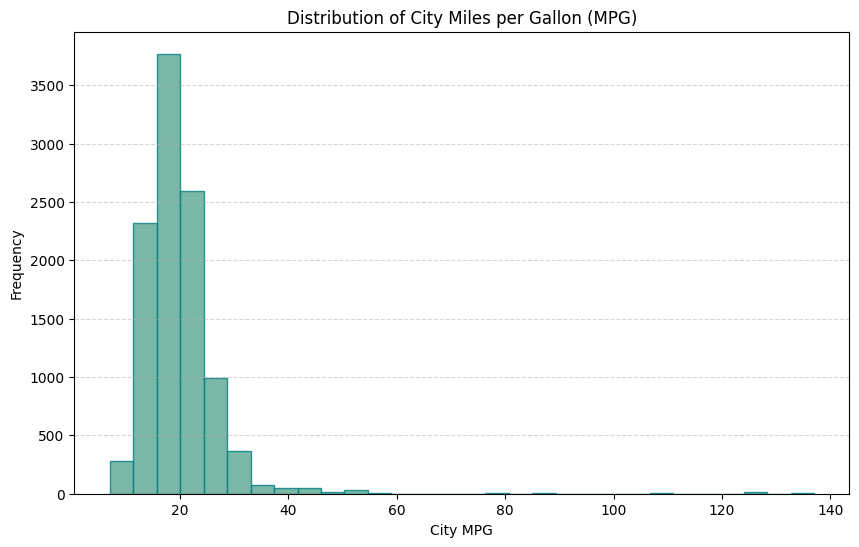

In [30]:
# Create plot figure
plt.figure(figsize=(10, 6))

# Create histogram with matplotlib.pyplot
plt.hist(
    clean_df['city mpg'],
    bins=30,
    edgecolor='teal',
    color='#59a590',
    alpha=0.8
    )

# Add plot title, labels and grid lines
plt.title('Distribution of City Miles per Gallon (MPG)')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

#### 5.3.2 **Bar Plot** | Average `MSRP` for each `Vehicle Size`

The bar chart reveals a clear relationship between vehicle size and pricing. As the size of the car increases from compact to midsize to large, the average price also rises. This indicates that larger vehicles tend to occupy a higher price segment in the market, reflecting both their greater production costs and their positioning as more premium options compared to smaller models.

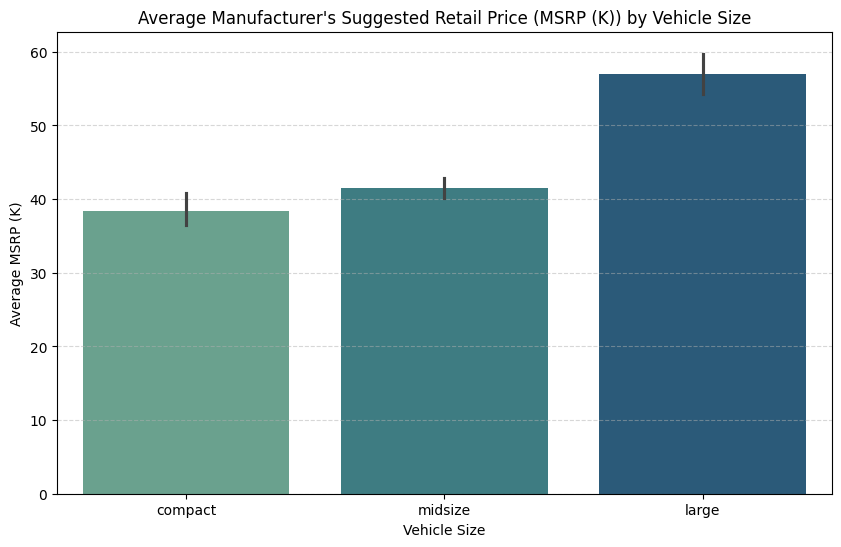

In [31]:
# Create plot figure
plt.figure(figsize=(10, 6))

# Create bar plot with seaborn
sns.barplot(
    data=clean_df,
    x='Vehicle Size',
    y='MSRP(K)',
    hue='Vehicle Size',
    palette='crest'
    )

# Add plot title, labels and grid lines
plt.title("Average Manufacturer's Suggested Retail Price (MSRP (K)) by Vehicle Size")
plt.xlabel('Vehicle Size')
plt.ylabel('Average MSRP (K)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

#### 5.3.3 **Scatter Plot** | Relationship between `Engine HP` and `MSRP`

The scatter plot shows a positive relationship between `Engine HP` and `MSRP` (Manufacturer's Suggested Retail Price). Vehicles with lower horsepower tend to cluster at the lower end of the price range, while higher‑powered vehicles are generally associated with higher prices. As horsepower increases, the spread of prices also becomes wider, indicating greater variability in cost among performance‑oriented models.

Beyond a certain point, a few extreme outliers emerge of very high‑horsepower vehicles that command exceptionally high prices compared to the main grouping. This suggests that while most vehicles follow the general trend of “more power, higher price,” a small subset of ultra‑high‑performance models stand apart as luxury or specialty offerings.

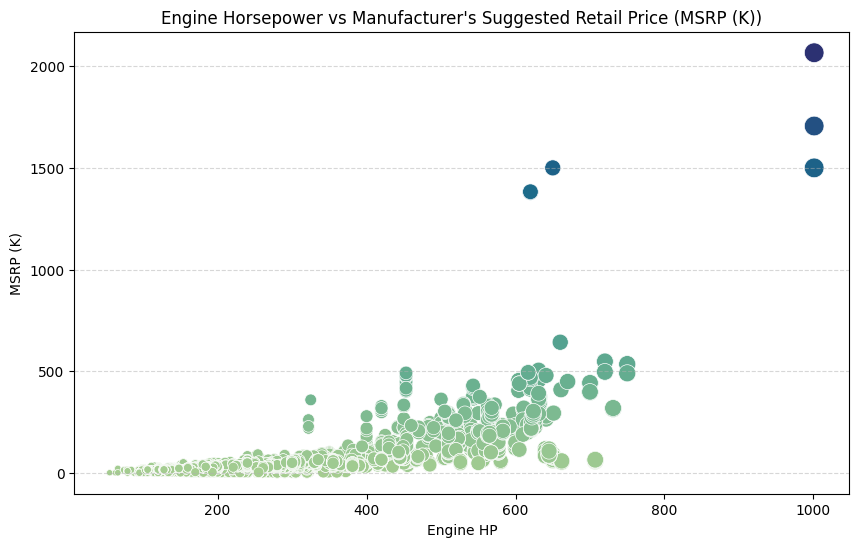

In [32]:
# Create plot figure
plt.figure(figsize=(10, 6))

# Create scatter plot with seaborn
sns.scatterplot(
    x=clean_df['Engine HP'],
    y=clean_df['MSRP(K)'],
    size=clean_df['Engine HP'],
    sizes=(20, 200),
    hue=clean_df['MSRP(K)'],
    palette='crest',
    legend=False
)

# Add plot title, labels and grid lines
plt.title("Engine Horsepower vs Manufacturer's Suggested Retail Price (MSRP (K))")
plt.xlabel('Engine HP')
plt.ylabel('MSRP (K)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

#### 5.3.4 **Box Plot** | Distribution of `MSRP` for each category in `Driven_Wheels`

The boxplot suggests that price distributions do vary across drivetrains. The overall patterns are driven more by the spread and presence of outliers than by large shifts in the typical price ranges. The central ranges are very close across drivetrains, but the wide scatter of outliers and extreme values makes it difficult to see finer differences in detail.

**Main takeaways:**

- **Rear‑wheel drive** and **all‑wheel drive** show the widest spreads, with many high‑priced outliers extending far beyond the main grouping.
- **Front‑wheel drive** is the most tightly clustered, with consistently lower prices and very few extreme outliers.
- **Four‑wheel drive vehicles** sits in between being broader than **front‑wheel drive**, but without the extreme luxury outliers of **rear‑ and all‑wheel drive**.

Overall, drivetrain type influences the variability and presence of outliers more than it shifts the typical (central) price levels.

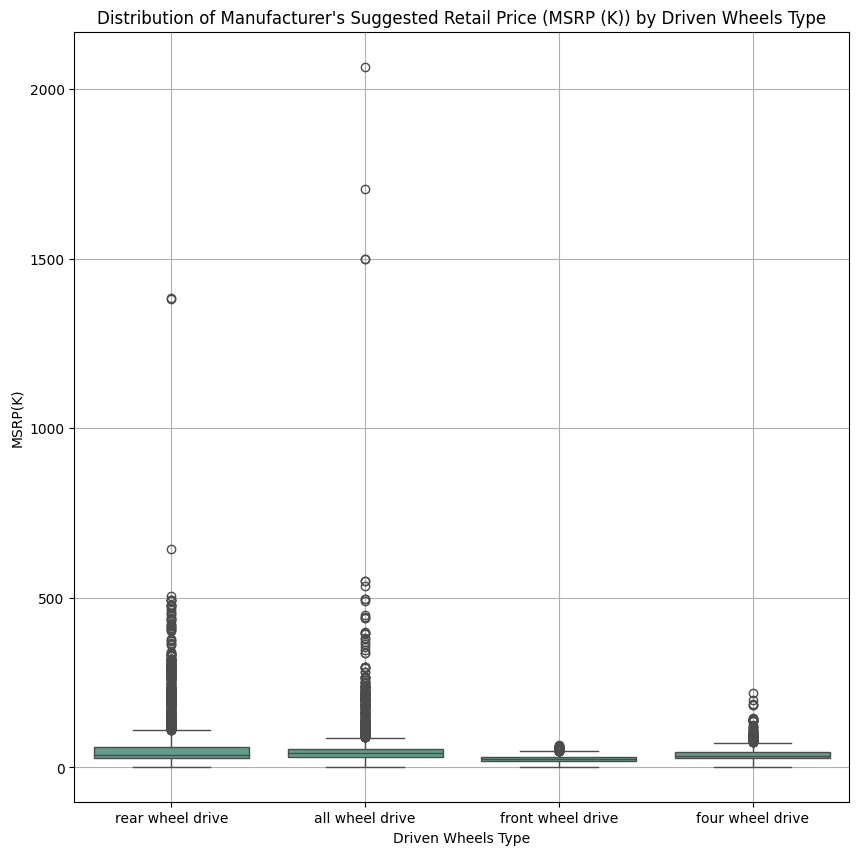

In [33]:
# Create plot figure
plt.figure(figsize=(10, 10))

# Create box plot with seaborn
sns.boxplot(
    data=clean_df,
    x='Driven_Wheels',
    y='MSRP(K)',
    color='#59a590'
    )

# Add plot title, labels and grid lines
plt.title("Distribution of Manufacturer's Suggested Retail Price (MSRP (K)) by Driven Wheels Type")
plt.xlabel('Driven Wheels Type')
plt.ylabel('MSRP(K)')
plt.grid(True)

# Show plot
plt.show()

#### 5.3.5 **Line Plot** | Average `city mpg` and `highway mpg` for different `Transmission Types`

Although line plots are used for continuous or temporal variables to show trend over time, this approach was chosen to align with the assignment’s requirement. It still offers meaningful insights despite being a categorical comparison.

Here we can see that **direct drive** vehicles stand out dramatically, achieving exceptionally high fuel efficiency in both city and highway contexts. Among the more conventional transmission types, fuel efficiency is broadly similar with highway MPG consistently higher than city MPG. Interestingly, **direct drive** vehicles deviate from this pattern, showing higher city MPG than highway MPG.

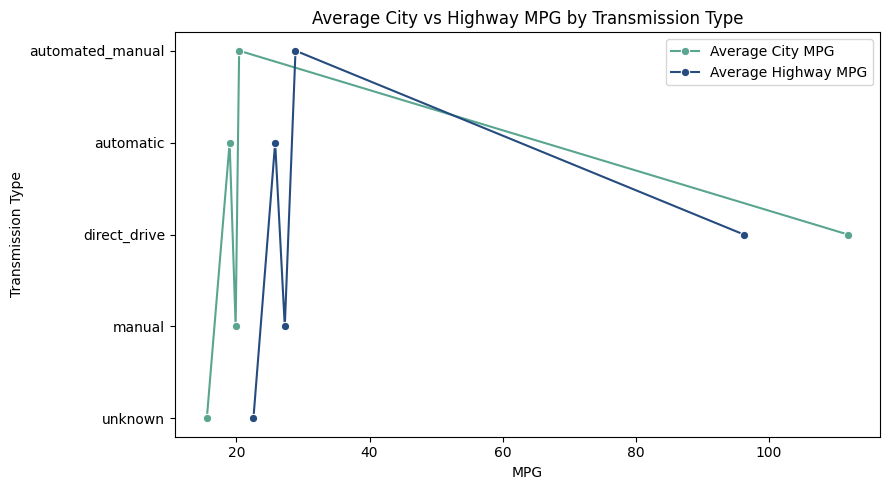

In [34]:
# Compute averages per transmission type
avg_mpg = clean_df.groupby("Transmission Type")[["city mpg", "highway MPG"]].mean().reset_index()

plt.figure(figsize=(9, 5))

# Line for city mpg (flipped axes)
sns.lineplot(
    data=avg_mpg,
    x="city mpg",
    y="Transmission Type",
    marker="o",
    color="#59a590",
    label="Average City MPG")

# Line for highway mpg (flipped axes)
sns.lineplot(
    data=avg_mpg,
    x="highway MPG",
    y="Transmission Type",
    marker="o",
    color="#254b7f",
    label="Average Highway MPG")

# Add title, labels and legend
plt.title("Average City vs Highway MPG by Transmission Type")
plt.xlabel("MPG")
plt.ylabel("Transmission Type")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

### 5.4 Correlation Analysis

Using a Pearson Correlation Matrix, the heatmap below explores the relationship between `Engine HP`, `MSRP`, `Popularity`, `city mpg`, and `highway MPG`. The following relationships stand out:

- _Horsepower shows a strong positive association with price_, confirming that more powerful vehicles tend to be more expensive, as seen in the scatter plot above.
- _City and highway mpg are very strongly correlated_, as expected, since vehicles efficient in one context are generally efficient in the other.
- _Price shows a weak negative correlation with fuel efficiency_, suggesting that more expensive cars tend to consume slightly more fuel, though this effect is less pronounced than the influence of horsepower.

Pearson Correlation Matrix:
             Engine HP      MSRP  Popularity  city mpg  highway MPG
Engine HP     1.000000  0.653623    0.031713 -0.453917    -0.433091
MSRP          0.653623  1.000000   -0.057403 -0.219055    -0.212743
Popularity    0.031713 -0.057403    1.000000 -0.003910    -0.021835
city mpg     -0.453917 -0.219055   -0.003910  1.000000     0.856346
highway MPG  -0.433091 -0.212743   -0.021835  0.856346     1.000000 



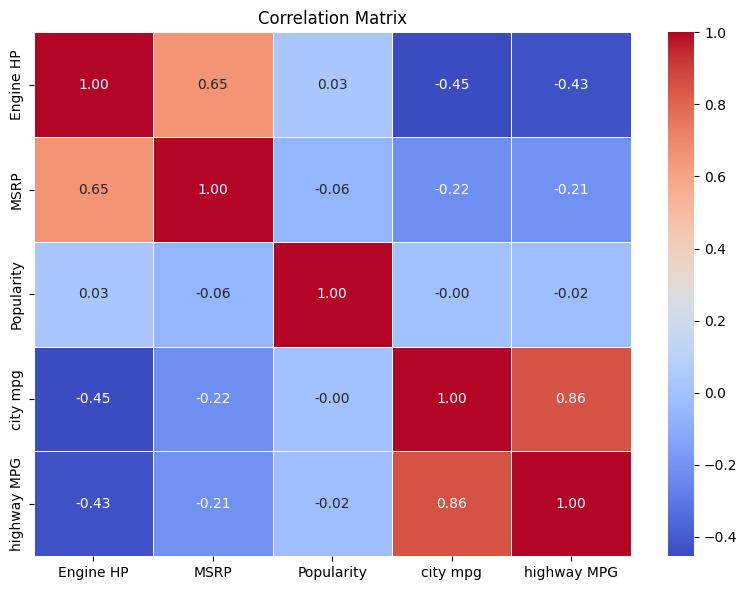

In [35]:
# Select relevant numerical columns
corr_cols = ["Engine HP", "MSRP", "Popularity", "city mpg", "highway MPG"]

# Compute Pearson correlation matrix
corr_matrix = clean_df[corr_cols].corr(method="pearson")

# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(corr_matrix, "\n")

# Set the figure size
plt.figure(figsize=(8, 6))

# Visualize the correlation matrix with a heatmap
# Select data to visualize
# Annotate each cell with it's numerical value rounded to 2
# Use a 'coolwarm' color scale (cool negative, warm positive)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
    )

# Add plot title
plt.title("Correlation Matrix")
plt.tight_layout()

# Show plot
plt.show()

## 6 - Key Insights and Conclusions

The exploratory analysis revealed several consistent patterns across the dataset. Vehicle size, horsepower, and drivetrain were all shown to influence pricing. Larger and more performance‑oriented cars generally command higher prices. However, horsepower emerged as the most important driver of this relationship, showing a very strong association with price.

While the distinction between city and highway usage does not have a strong correlation with fuel efficiency, drivetrain type had a clear influence. Certain drivetrains consistently clustered around higher or lower efficiency levels, highlighting how design choices shape overall performance.